# Exercise 12-1 & 12-2

### DSC530
#### Taniya Adhikari
##### 11/08/2020



In [117]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

Load the data from "Price of Weed".

In [139]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


The following function takes a DataFrame of transactions and compute daily averages.

In [140]:
def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

The following function returns a map from quality name to a DataFrame of daily averages.

In [141]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

`dailies` is the map from quality name to DataFrame.

In [145]:
dailies = GroupByQualityAndDay(transactions)

The following plots the daily average price for each quality.

C:\Users\taniy\Documents\GitHub\ThinkStats2\code\thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


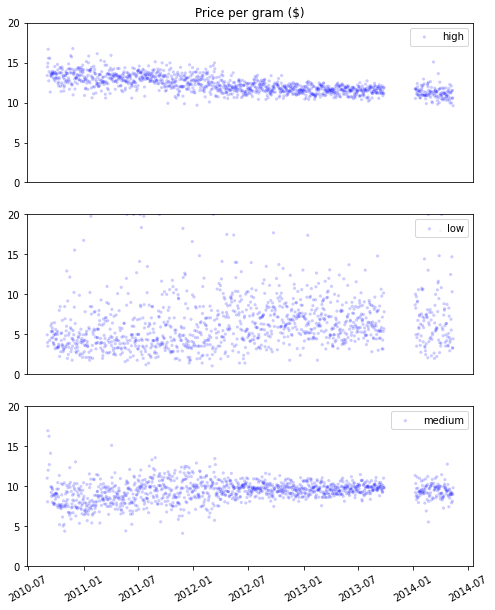

In [146]:
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows=3)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i+1)
    title = 'Price per gram ($)' if i == 0 else ''
    thinkplot.Config(ylim=[0, 20], title=title)
    thinkplot.Scatter(daily.ppg, s=10, label=name)
    if i == 2: 
        plt.xticks(rotation=30)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks=[])

We can use `statsmodels` to run a linear model of price as a function of time.

## Exercises 12-1

The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

**Quadratic Model**

In [171]:
import statsmodels.formula.api as smf

# quadratic model with variable years^2.
def RunQuadraticModel(daily):
    daily['year2'] = daily.years**2
    model = smf.ols('ppg ~ years + year2', data=daily)
    results = model.fit()
    return model, results

**Below code generates resuls for different quality of weed**

In [172]:
from IPython.display import display

# generate results for each quality group
for name, daily in dailies.items():
    print(name)
    model, results = RunQuadraticModel(daily)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Mon, 09 Nov 2020   Prob (F-statistic):          4.57e-164
Time:                        17:34:01   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
year2          0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     22.86
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.83e-10
Time:                        17:34:01   Log-Likelihood:                -3086.5
No. Observations:                1179   AIC:                             6179.
Df Residuals:                    1176   BIC:                             6194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7050      0.287     16.393      0.000       4.142       5.268
years          1.6329      0.357      4.573      0.000       0.932       2.334
year2         -0.2937      0.095     -3.091      0.002      -0.480      -0.107
==============================================================================
Omnibus:                      661.159   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.787
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      13.651   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     57.33
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.55e-24
Time:                        17:34:01   Log-Likelihood:                -2030.6
No. Observations:                1238   AIC:                             4067.
Df Residuals:                    1235   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3509      0.104     80.512      0.000       8.147       8.554
years          1.1472      0.130      8.806      0.000       0.892       1.403
year2         -0.2386      0.035     -6.878      0.000      -0.307      -0.171
==============================================================================
Omnibus:                      194.417   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.295
Skew:                           0.585   Prob(JB):                    1.20e-244
Kurtosis:                       7.517   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 #### Fitted Value Plots

In [173]:
# function for fitted model with the data
def PlotFittedValues(model, results, label=''):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]  # exogeneous variable, also explanatory variable
    values = model.endog     # endogeneous variable, also dependent variable
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     xlim=[-0.1, 3.8],
                     ylabel='Price per gram ($)')

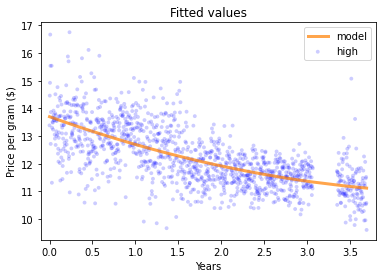

In [174]:
name = 'high'
daily = dailies[name]
model, results = RunQuadraticModel(daily)
PlotFittedValues(model, results, label=name)


#### Prediction Plots

Below code generate a prediction data frame with Intercept and explanatory variables


In [175]:
def GenerateSimplePrediction(results, years, year2):
    """Generates a simple prediction.

    results: results object
    years: sequence of times (in years) to make predictions for

    returns: sequence of predicted values
    """
    n = len(years)
    inter = np.ones(n)
    
    # creates a dictionary for both years and years^2
    d = dict(Intercept=inter, years=years, year2=years**2)
    
    predict_df = pd.DataFrame(d)
    
    predict = results.predict(predict_df)
    return predict

In [176]:
def PlotSimplePrediction(results, years, year2):
    predict = GenerateSimplePrediction(results, years, year2)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color='#ff7f00')
    xlim = years[0]-0.1, years[-1]+0.1
    thinkplot.Config(title='Predictions',
                 xlabel='Years',
                 xlim=xlim,
                 ylabel='Price per gram ($)',
                 loc='upper right')

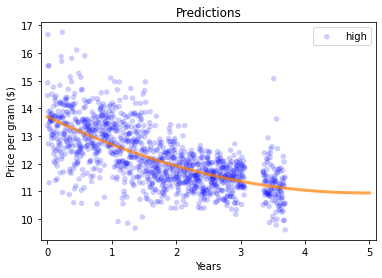

In [177]:
name = 'high'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
years = np.linspace(0, 5, 101)
year2 = np.linspace(0, 5, 101)

PlotSimplePrediction(results, years, year2)

## Exercises 12-2

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [178]:
# calculates serial correlation
def SerialCorr(series, lag=1):
    xs = series[lag:]    # variable with lag=1
    ys = series.shift(lag)[lag:]   # shifted variable with lag
    corr = thinkstats2.Corr(xs, ys)
    return corr

Below is the class named SerialCorrelationTest that extends HypothesisTest from Section 9.2

In [179]:
class SerialCorrelationTest(thinkstats2.HypothesisTest):
   
    # computes the test statistic correlation.
    def TestStatistic(self, data):
        series, lag = data
        test_stat = abs(SerialCorr(series, lag=1))
        return test_stat

    # simulates the null hypothesis
    def RunModel(self):
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [184]:
name = 'high'
daily = dailies[name]

series = daily.ppg
corr_test = SerialCorrelationTest((series, 1))   # runs the Correlation test object and it's function
pvalue = corr_test.PValue()   # calculates the p-value from HypothesisTest
print(corr_test.actual, pvalue)

0.4852293761947381 0.0


**The Pvalue is 0.0 for the serial correlation test for high quality weed with r = 0.485**

In [185]:
# linear model
def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

In [187]:
# serial correlation for linear model
model, results = RunLinearModel(daily)
series = results.resid
scorr_test = SerialCorrelationTest((series, 1))
pvalue = scorr_test.PValue()
print(scorr_test.actual, pvalue)                                    

0.07570473767506261 0.005


The p-value os 0.005 for residuals and serial correlation is 0.076

In [188]:
# serial correlation for quadratic model
model, results = RunLinearModel(daily)
series = results.resid
scorr_test = SerialCorrelationTest((series, 1))
pvalue = scorr_test.PValue()
print(scorr_test.actual, pvalue)                                    

0.07570473767506261 0.007


The p-value os 0.007 for residuals and serial correlation is 0.076